In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.lstm import LSTMModelMultiStep, LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scripts.general_scripts.model_shorcut import test_predict

2025-06-30 22:11:26 [ERROR] Importing plotly failed. Interactive plots will not work.
2025-06-30 22:11:26 [ERROR] Importing plotly failed. Interactive plots will not work.


In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecasts = 2
seasonal_periods = 261

Index(['Date', 'VN_Index_Close', 'Total Volume', 'Total Value'], dtype='object')
Seasonality Strength: 0.11


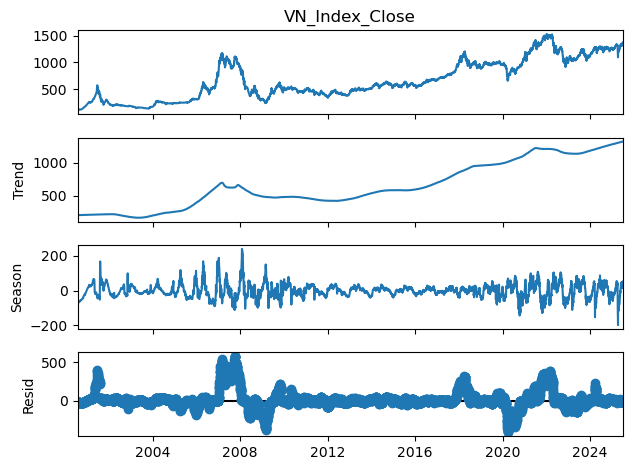

<Figure size 1200x400 with 0 Axes>

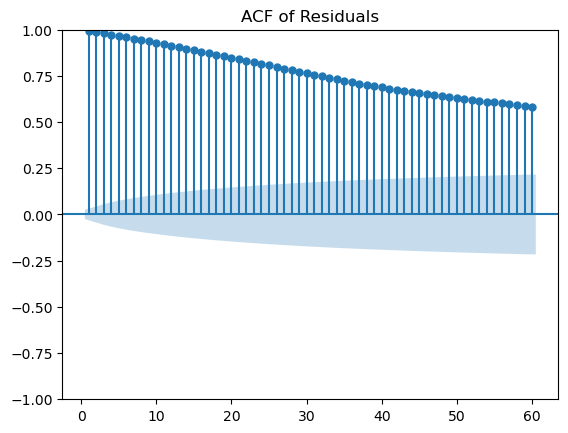

In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_index_data/cleaned_vn_index_data.csv"
df = pd.read_csv(file_path_1)
print(df.columns)
df_1 = quicky_data(df.copy(), seasonal_periods, plot=True)

In [5]:
df_1.tail(20)

,VN_Index_Close,Total Volume,Total Value,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,,,
2025-06-02,1336.30,9.632306e+08,2.084381e+13,1313.311681,33.481763,-10.493444,0.000000,1.000000,0.5,-0.866025
2025-06-03,1347.25,1.156455e+09,2.572575e+13,1313.672077,46.595346,-13.017423,0.781831,0.623490,0.5,-0.866025
2025-06-04,1345.74,1.044891e+09,2.348614e+13,1314.032404,47.154329,-15.446732,0.974928,-0.222521,0.5,-0.866025
2025-06-05,1342.09,8.190327e+08,1.917002e+13,1314.392660,44.778231,-17.080890,0.433884,-0.900969,0.5,-0.866025
2025-06-06,1329.89,1.004951e+09,2.401604e+13,1314.752845,34.725473,-19.588319,-0.433884,-0.900969,0.5,-0.866025
2025-06-09,1310.57,7.926355e+08,1.781947e+13,1315.112960,16.277979,-20.820939,0.000000,1.000000,0.5,-0.866025
2025-06-10,1316.23,7.843649e+08,1.843090e+13,1315.473004,23.067488,-22.310492,0.781831,0.623490,0.5,-0.866025
2025-06-11,1315.20,6.065814e+08,1.447254e+13,1315.832978,13.383078,-14.016056,0.974928,-0.222521,0.5,-0.866025
2025-06-12,1322.99,8.616240e+08,1.979900e+13,1316.192880,18.910491,-12.113371,0.433884,-0.900969,0.5,-0.866025


In [6]:
df.iloc[-21:]

,Date,VN_Index_Close,Total Volume,Total Value
6034,2025-05-30,1332.60,9.846371e+08,2.232989e+13
6035,2025-06-02,1336.30,9.632306e+08,2.084381e+13
6036,2025-06-03,1347.25,1.156455e+09,2.572575e+13
6037,2025-06-04,1345.74,1.044891e+09,2.348614e+13
6038,2025-06-05,1342.09,8.190327e+08,1.917002e+13
6039,2025-06-06,1329.89,1.004951e+09,2.401604e+13
6040,2025-06-09,1310.57,7.926355e+08,1.781947e+13
6041,2025-06-10,1316.23,7.843649e+08,1.843090e+13
6042,2025-06-11,1315.20,6.065814e+08,1.447254e+13
6043,2025-06-12,1322.99,8.616240e+08,1.979900e+13


In [7]:
final_df, metrics_df, forecast_df = test_predict(df, 2, n_forecasts, seasonal_periods, scaler, 'LSTM', criterion, n_lags)

            Date  Baseline Predicted VN-INDEX
6052  2025-06-25                      1366.75
            Date  Predicted VN-INDEX
6052  2025-06-25             1366.75
         Date  Baseline Predicted VN-INDEX
0  2025-06-26                  1366.707000
1  2025-06-27                  1371.400012


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

2025-06-30 22:11:39 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

2025-06-30 22:11:39 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported ind

Seasonality Strength: 0.11


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

2025-06-30 22:14:00 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

2025-06-30 22:14:00 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported ind

Final: Training Loss: 0.5488 - Val Loss: 0.1001
RMSE: 3.5383, MAE: 3.4550, R²: -125183.9580, Directional Accuracy: 0.0000
           Date  Predicted VN-INDEX
6053 2025-06-26         1361.568679
6054 2025-06-27         1362.827122


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

2025-06-30 22:14:05 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

2025-06-30 22:14:05 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported ind

Seasonality Strength: 0.11


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

2025-06-30 22:17:04 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(

2025-06-30 22:17:04 [WARNING] /opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported ind

Final: Training Loss: 0.5492 - Val Loss: 0.0003
RMSE: 2.5784, MAE: 2.0208, R²: 0.2013, Directional Accuracy: 1.0000


In [8]:
metrics_df

,Model,MAE,RMSE,Directional Accuracy
0,ExponentialSmoothing,0.538494,0.733815,1.0
1,LSTM,6.357099,6.745461,1.0


In [9]:
final_df

,Date,Actual VN-INDEX,Baseline Predicted VN-INDEX,Predicted VN-INDEX
1,2025-06-26,1365.67,1366.707000,1361.568679
2,2025-06-27,1371.44,1371.400012,1362.827122
